In [2]:
!pip install fredapi

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import seaborn as sns
fred = Fred(api_key='4cb783c2de3eeb396b405be6b2040998')

In [4]:
print("Fetching Data From FRED")
wages=fred.get_series('AHETPI')
consprindex=fred.get_series('CPIAUCSL')
df=pd.DataFrame({"Nominal Wages":wages, "CPI" :consprindex})
df=df.dropna()
print(df.head())
print(df.tail())

Fetching Data From FRED
            Nominal Wages    CPI
1964-01-01           2.50  30.94
1964-02-01           2.50  30.91
1964-03-01           2.51  30.94
1964-04-01           2.52  30.95
1964-05-01           2.52  30.98
            Nominal Wages      CPI
2025-07-01          31.35  322.132
2025-08-01          31.45  323.364
2025-09-01          31.52  324.368
2025-11-01          31.73  325.031
2025-12-01          31.76  326.030


In [5]:
def get_real_wage(wages,consprindex):
  cpi_latest=consprindex.iloc[-1]
  return (wages/consprindex)*cpi_latest
  df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])
print(df.tail())

            Nominal Wages      CPI
2025-07-01          31.35  322.132
2025-08-01          31.45  323.364
2025-09-01          31.52  324.368
2025-11-01          31.73  325.031
2025-12-01          31.76  326.030


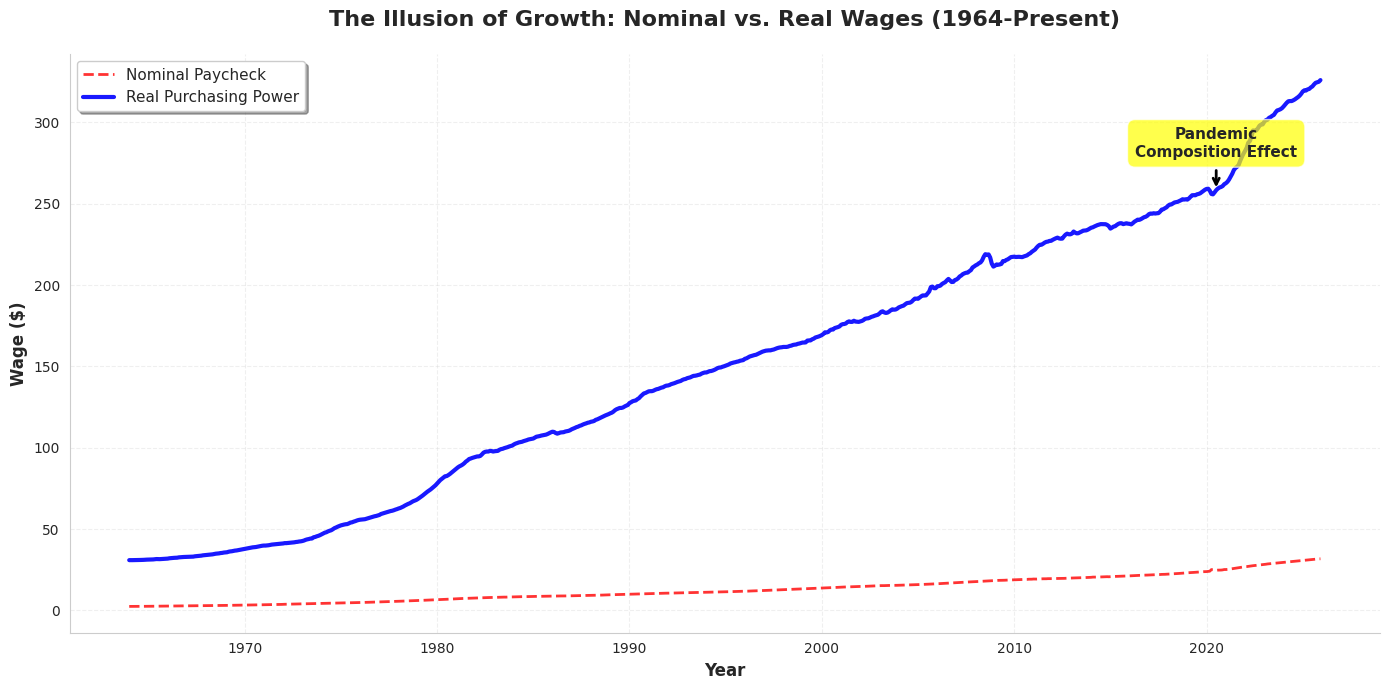

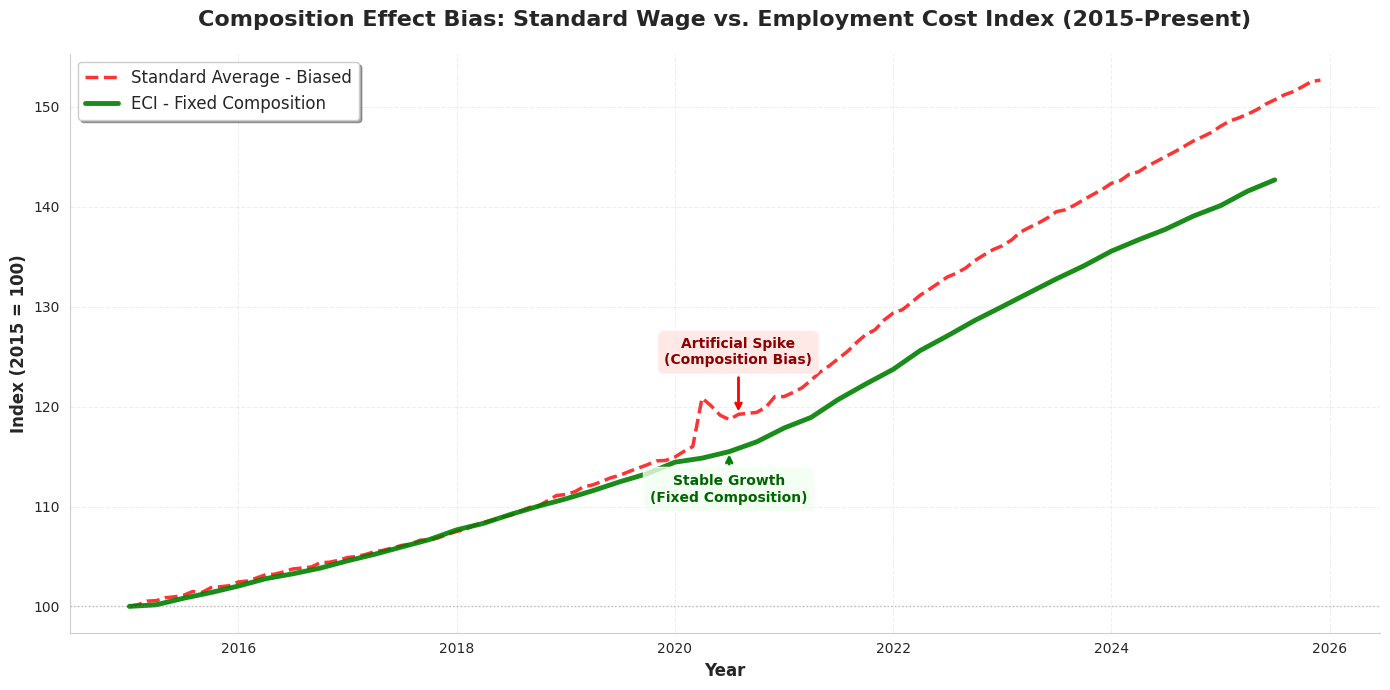


📈 OVERALL GROWTH (1964-2025):
   Nominal Wage: +1170.4%
   Real Wage: +953.7%
   💰 Inflation ate: 216.7% of gains

🏆 BEST YEAR: 1973 (+1.81%)
💔 WORST YEAR: 2008 (-1.77%)

📅 LAST 5 YEARS REAL WAGE GROWTH: +24.42%

⏸️  STAGNATION ALERT: 14 months of <0.5% annual growth

🎯 PURCHASING POWER CHECK:
   Peak Real Wage: $326.03 in 2025
   Current Real Wage: $326.03
   ✅ Workers at ALL-TIME HIGH purchasing power!



In [10]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(14, 7))


ax.plot(df.index, df[col1],
        color='red', linestyle='--', linewidth=2,
        label='Nominal Paycheck', alpha=0.8)

ax.plot(df.index, df[col2],
        color='blue', linestyle='-', linewidth=3,
        label='Real Purchasing Power', alpha=0.9)


ax.set_title('The Illusion of Growth: Nominal vs. Real Wages (1964-Present)',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Wage ($)', fontsize=12, fontweight='bold')


ax.legend(loc='best', fontsize=11, frameon=True, shadow=True)


try:

    mask_2020 = (df.index.year == 2020)
    if mask_2020.any():
        spike_dates = df[mask_2020].index
        spike_date = spike_dates[len(spike_dates)//2]
        spike_value = df.loc[spike_date, col2]

        ax.annotate('Pandemic\nComposition Effect',
                    xy=(spike_date, spike_value),
                    xytext=(spike_date, spike_value * 1.08),
                    arrowprops=dict(arrowstyle='->', color='black', lw=2),
                    fontsize=11, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                    ha='center')
    else:
        print("Note: No 2020 data found for annotation")
except Exception as e:
    print(f"Could not add annotation: {e}")


ax.grid(True, alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()



try:

    eciwag = fred.get_series('ECIWAG')


    start_date = '2015-01-01'
    wages_filtered = wages[wages.index >= start_date]
    eciwag_filtered = eciwag[eciwag.index >= start_date]


    wages_rebased = (wages_filtered / wages_filtered.iloc[0]) * 100
    eciwag_rebased = (eciwag_filtered / eciwag_filtered.iloc[0]) * 100


    fig, ax = plt.subplots(figsize=(14, 7))


    ax.plot(wages_rebased.index, wages_rebased,
            color='red', linestyle='--', linewidth=2.5,
            label='Standard Average - Biased', alpha=0.8)

    ax.plot(eciwag_rebased.index, eciwag_rebased,
            color='green', linestyle='-', linewidth=3.5,
            label='ECI - Fixed Composition', alpha=0.9)

    ax.set_title('Composition Effect Bias: Standard Wage vs. Employment Cost Index (2015-Present)',
                 fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax.set_ylabel('Index (2015 = 100)', fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=12, frameon=True, shadow=True)


    try:
        mask_2020_wages = (wages_rebased.index.year == 2020) & (wages_rebased.index.month >= 3)
        mask_2020_eci = (eciwag_rebased.index.year == 2020) & (eciwag_rebased.index.month >= 3)

        if mask_2020_wages.any() and mask_2020_eci.any():
            anno_date_wages = wages_rebased[mask_2020_wages].index[len(wages_rebased[mask_2020_wages])//2]
            anno_date_eci = eciwag_rebased[mask_2020_eci].index[len(eciwag_rebased[mask_2020_eci])//2]

            wages_2020_val = wages_rebased.loc[anno_date_wages]
            eciwag_2020_val = eciwag_rebased.loc[anno_date_eci]

            ax.annotate('Artificial Spike\n(Composition Bias)',
                        xy=(anno_date_wages, wages_2020_val),
                        xytext=(anno_date_wages, wages_2020_val + 5),
                        arrowprops=dict(arrowstyle='->', color='red', lw=2),
                        fontsize=10, fontweight='bold', color='darkred',
                        bbox=dict(boxstyle='round,pad=0.5', facecolor='mistyrose', alpha=0.8),
                        ha='center')


            ax.annotate('Stable Growth\n(Fixed Composition)',
                        xy=(anno_date_eci, eciwag_2020_val),
                        xytext=(anno_date_eci, eciwag_2020_val - 5),
                        arrowprops=dict(arrowstyle='->', color='green', lw=2),
                        fontsize=10, fontweight='bold', color='darkgreen',
                        bbox=dict(boxstyle='round,pad=0.5', facecolor='honeydew', alpha=0.8),
                        ha='center')
    except Exception as e:
        print(f"Could not add 2020 annotations: {e}")


    ax.grid(True, alpha=0.3, linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.axhline(y=100, color='gray', linestyle=':', linewidth=1, alpha=0.5)

    plt.tight_layout()
    plt.show()

except NameError as e:
    print(f"Note: Chart 2 requires 'wages' series and 'fred' object: {e}")
except Exception as e:
    print(f"Error creating Chart 2: {e}")

nominal_growth = ((df[col1].iloc[-1] / df[col1].iloc[0]) - 1) * 100
real_growth = ((df[col2].iloc[-1] / df[col2].iloc[0]) - 1) * 100
print(f"\n📈 OVERALL GROWTH ({df.index[0].year}-{df.index[-1].year}):")
print(f"   Nominal Wage: +{nominal_growth:.1f}%")
print(f"   Real Wage: {real_growth:+.1f}%")
print(f"   💰 Inflation ate: {nominal_growth - real_growth:.1f}% of gains")

real_changes = df[col2].pct_change() * 100
best_year = real_changes.idxmax()
worst_year = real_changes.idxmin()
print(f"\n🏆 BEST YEAR: {best_year.year} ({real_changes[best_year]:+.2f}%)")
print(f"💔 WORST YEAR: {worst_year.year} ({real_changes[worst_year]:+.2f}%)")

recent_5y = df[df.index >= df.index[-1] - pd.DateOffset(years=5)]
recent_growth = ((recent_5y[col2].iloc[-1] / recent_5y[col2].iloc[0]) - 1) * 100
print(f"\n📅 LAST 5 YEARS REAL WAGE GROWTH: {recent_growth:+.2f}%")

df['real_ma'] = df[col2].rolling(window=12).mean()
stagnant_mask = abs(df['real_ma'].pct_change(12) * 100) < 0.5
if stagnant_mask.any():
    stagnant_periods = df[stagnant_mask].index
    print(f"\n⏸️  STAGNATION ALERT: {len(stagnant_periods)} months of <0.5% annual growth")


current_real = df[col2].iloc[-1]
max_real = df[col2].max()
max_real_year = df[col2].idxmax().year
print(f"\n🎯 PURCHASING POWER CHECK:")
print(f"   Peak Real Wage: ${max_real:.2f} in {max_real_year}")
print(f"   Current Real Wage: ${current_real:.2f}")
if current_real < max_real:
    loss_pct = ((max_real - current_real) / max_real) * 100
    print(f"   ⚠️  Workers have LOST {loss_pct:.1f}% purchasing power since peak!")
else:
    print(f"   ✅ Workers at ALL-TIME HIGH purchasing power!")

print("\n" + "="*60)